# Week 8 HW - CUNY DATA 620

---

Jeff Shamp, John Kellogg

In [17]:
import nltk 
import pandas as pd
import string
import matplotlib.pyplot as plt
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords

## Data - Moby Dick first four chapters

In [4]:
def read_file(filepath):
    
    with open(filepath) as f:
        str_text = f.read()
    
    return str_text

In [5]:
md = read_file('moby_dick_four_chapters.txt')

In [6]:
tokens = nltk.word_tokenize(md)

In [7]:
nopunc = [token for token in tokens if token not in string.punctuation]
nopunc = [token for token in nopunc if token not in "--"]

In [8]:
nopunc[:10]

['Call',
 'me',
 'Ishmael',
 'Some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long']

In [9]:
len(nopunc)

11417

There are around 11000 words in the corpus.

In [10]:
fdist1 = nltk.FreqDist(nopunc)

In [11]:
filtered_word_freq = dict((word, freq) for word, freq in fdist1.items())
print(len(filtered_word_freq))

2876


## Unique Words

Almost 2900 unique words. Unique meaning they are tokenized by ntlk as an individual word. There is likely some punctuation still lurking in this corpus as a "word".

In [12]:
values = []
j =10
while sum(values) < len(nopunc)/2:
    for i in range(j):
        value = fdist1.most_common(100)[i][1]
        values.append(value)
    j+=1
    print(j, sum(values))


11 2775
12 5661
13 8658


## Half the Corpus 

Half the corpus is composed of the top twelve most common words. They are as follows.

In [13]:
fdist1.most_common(12)

[('the', 573),
 ('a', 391),
 ('and', 357),
 ('of', 317),
 ('I', 281),
 ('to', 244),
 ('in', 211),
 ('that', 142),
 ('it', 141),
 ('his', 118),
 ('he', 111),
 ('was', 111)]

Since we have the top 12 most common below we will show the bottom 10 of the top 200. 

In [14]:
top_200 = fdist1.most_common(200)
top_200[-10:]

[('side', 8),
 ('window', 8),
 ('cannibal', 8),
 ('mind', 7),
 ('every', 7),
 ('With', 7),
 ('There', 7),
 ('town', 7),
 ('better', 7),
 ('without', 7)]

Cannibal is kind of common in the first four chapters of Moby Dick. 

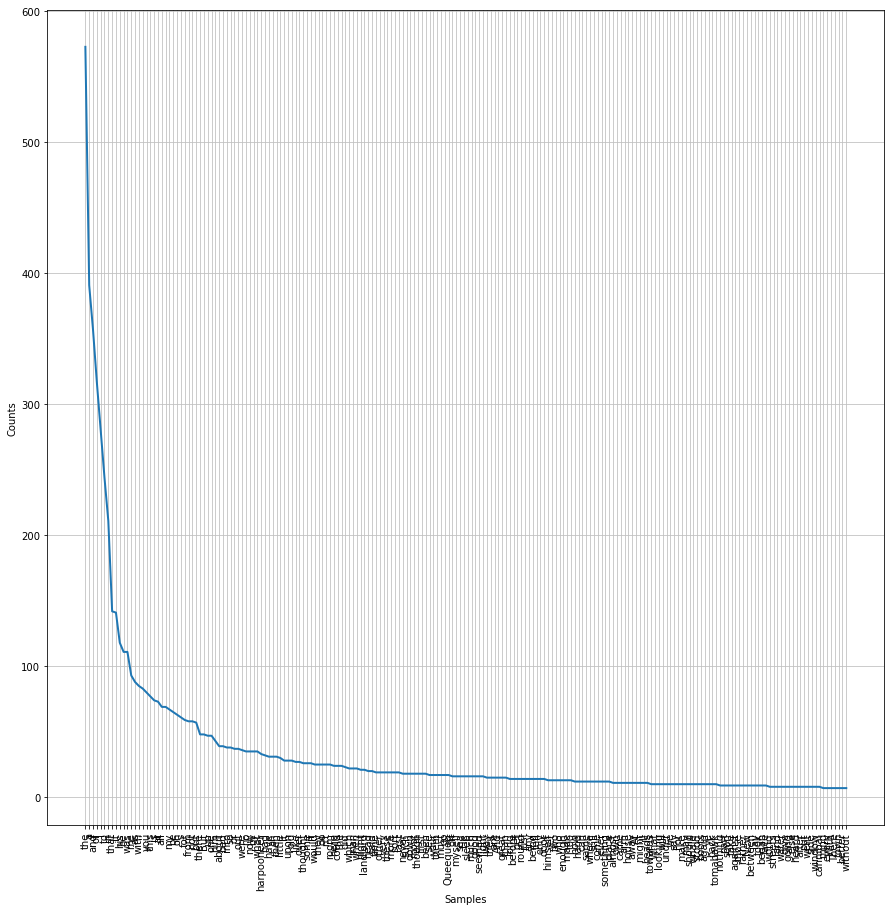

In [15]:
plt.figure(figsize=(15,15))
fdist1.plot(200,cumulative=False)
plt.show()

Classic case for TF-IDF and stopwords. 

## Zipf's Law

Zipf's law is generally as follows for natural languages; the frequency of any word is inversely proportional to its rank in the frequency table. That is absolutely true in this case. We see what looks to be 1/x decay in the above plot. 

## “all words in all corpora."

Moby Dick is a period piece from 1850 that takes place at sea and was specifically written with a unique prose. The book is also very long. For these reasons is likely that this corpora is highly similar to "all words in all corpora" in that there is ample time and space for span a large section of all possible words. 

[Video Submission](!https://youtu.be/WS3FVdVVeHo)

## Stop Word Removal

This assignment did not mention the use of stopwords, but they exist and we can drop them from this corpus 
and re-evaluate the frequency distribution. 

In [19]:
no_stopwords = [word for word in nopunc if word.lower() not in stopwords.words('english')]

In [21]:
fdist2 = nltk.FreqDist(no_stopwords)

In [27]:
fdist2.most_common(20)

[("''", 83),
 ('``', 69),
 ("'s", 61),
 ('one', 47),
 ('bed', 39),
 ('harpooneer', 33),
 ('little', 30),
 ('upon', 28),
 ('old', 28),
 ('like', 27),
 ('thought', 26),
 ('would', 25),
 ("n't", 25),
 ('room', 25),
 ('could', 24),
 ('man', 22),
 ('night', 21),
 ('landlord', 21),
 ('head', 20),
 ('said', 20)]

These words are a bit more interesting, but really what we need to extract interesting words from a text is TFIDF. 